<a href="https://colab.research.google.com/github/jackiekuen2/notes-handson-ml-tf/blob/master/ch8_ExerciseQ10_tSNE_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# a = []
# while(1):
#     a.append('1')

In [0]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1)
#mnist['target'] = mnist['target'].astype(np.int64)

In [0]:
mnist.data.shape

(70000, 784)

In [0]:
np.random.seed(42)

m = 10000

# pick the first 10000 index from a list of random indices
idx = np.random.permutation(70000)[:m]

In [0]:
X = mnist['data'][idx]
y = mnist['target'][idx]

In [0]:
y = y.astype(np.int64)

In [0]:
print(X.shape, y.shape)

(10000, 784) (10000,)


# Part A: t-SNE

## All Digits

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

# Use t-SNE to visualize MNIST images in 2D
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

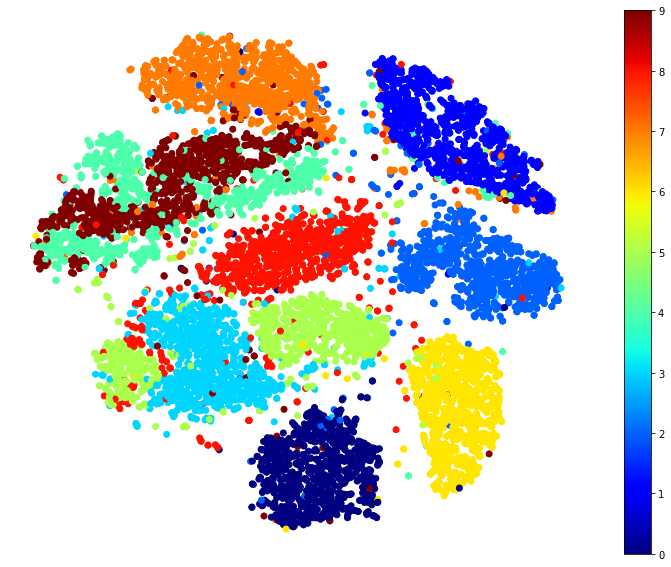

In [0]:
plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()

## Digits 2, 3, 5

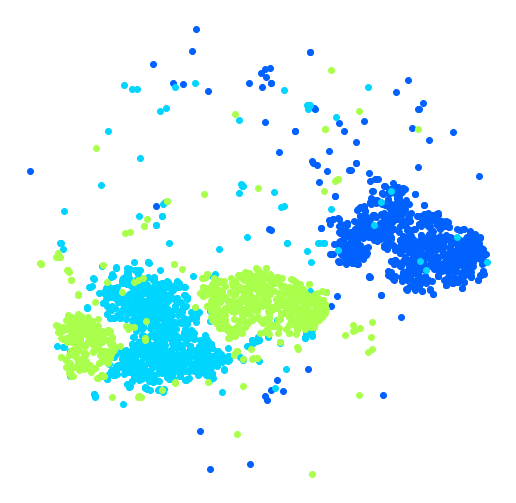

In [0]:
import matplotlib

# Focus on digits 3 and 5, which seem to overlap a lot
plt.figure(figsize=(9, 9))
cmap = matplotlib.cm.get_cmap('jet')
for digit in (2, 3, 5):
    plt.scatter(X_reduced[y==digit, 0], X_reduced[y==digit, 1], c=[cmap(digit/9)])
plt.axis('off')
plt.show()

In [0]:
idx = (y==2) | (y==3) |(y==5)

X_subset = X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

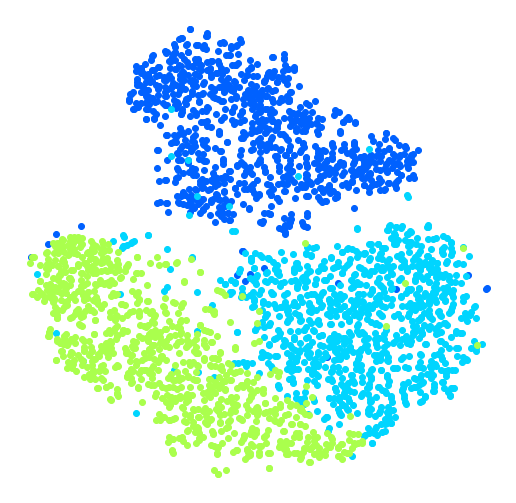

In [0]:
plt.figure(figsize=(9, 9))
for digit in (2, 3, 5):
    plt.scatter(X_subset_reduced[y_subset==digit, 0], 
                X_subset_reduced[y_subset==digit, 1], 
                c=[cmap(digit/9)])
plt.axis('off')
plt.show()

# Part B: Try PCA, LLE, MDs, and LDA

## PCA

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca_reduced = pca.fit_transform(X)

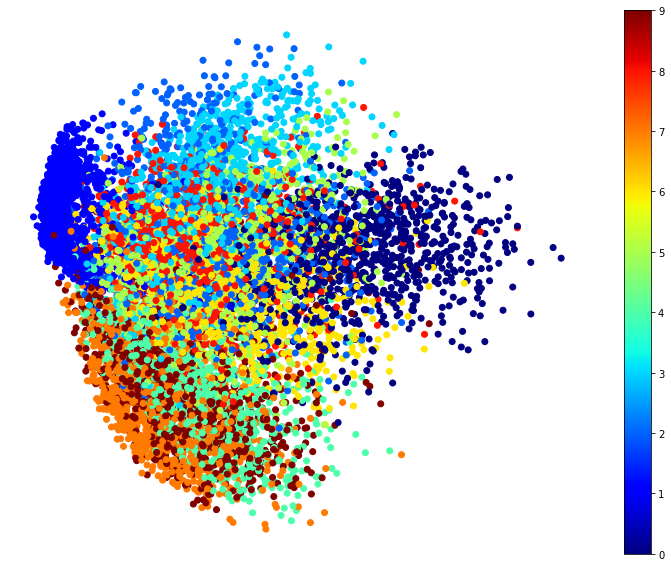

In [0]:
plt.figure(figsize=(13, 10))
plt.scatter(X_pca_reduced[:, 0], X_pca_reduced[:, 1], c=y, cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()

PCA: Fast, but too much overlap

## LLE

In [0]:
from sklearn.manifold import LocallyLinearEmbedding
import time

lle = LocallyLinearEmbedding(n_components=2, random_state=42)

start_time = time.time()

X_lle_reduced = lle.fit_transform(X)

print("LLE: {}s".format(time.time() - start_time))

LLE: 204.05075407028198s


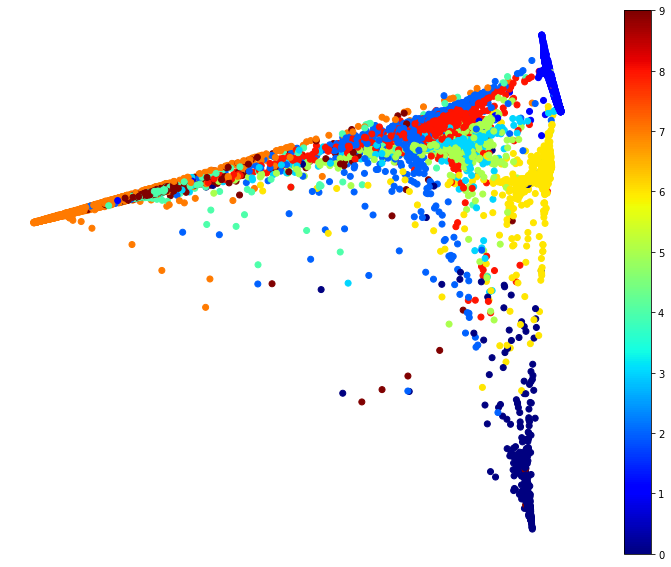

In [0]:
plt.figure(figsize=(13, 10))
plt.scatter(X_lle_reduced[:, 0], X_lle_reduced[:, 1], c=y, cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()

LLE: Took a while, and the result does not look good

## PCA preserving 95% explained variance ratio + LLE

In [0]:
from sklearn.pipeline import Pipeline

pca_lle_pipeline = Pipeline(
    [
     ('pca', PCA(n_components=0.95, random_state=42)),
     ('lle', LocallyLinearEmbedding(n_components=2, random_state=42))
     ])

start_time = time.time()

X_pca_lle_reduced = pca_lle_pipeline.fit_transform(X)

print("PCA + LLE: {}s".format(time.time() - start_time))

PCA + LLE: 56.30183172225952s


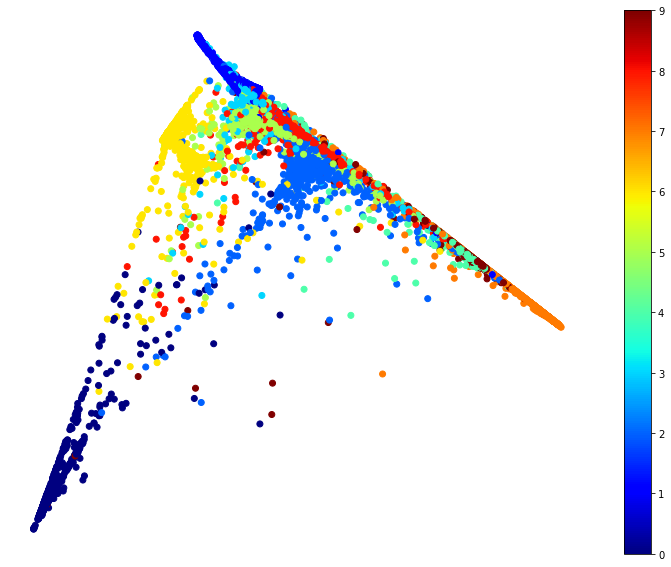

In [0]:
plt.figure(figsize=(13, 10))
plt.scatter(X_pca_lle_reduced[:, 0], X_pca_lle_reduced[:, 1], c=y, cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()

PCA + LLE: The result looks similar to LLE only, but it was almost 4x faster

# MDS

In [0]:
# Try 2000 instances

from sklearn.manifold import MDS

m = 2000

start_time = time.time()

mds = MDS(n_components=2, random_state=42)

X_mds_reduced = mds.fit_transform(X[:m])

print("MDS: {}s".format(time.time() - start_time))

MDS: 108.34294867515564s


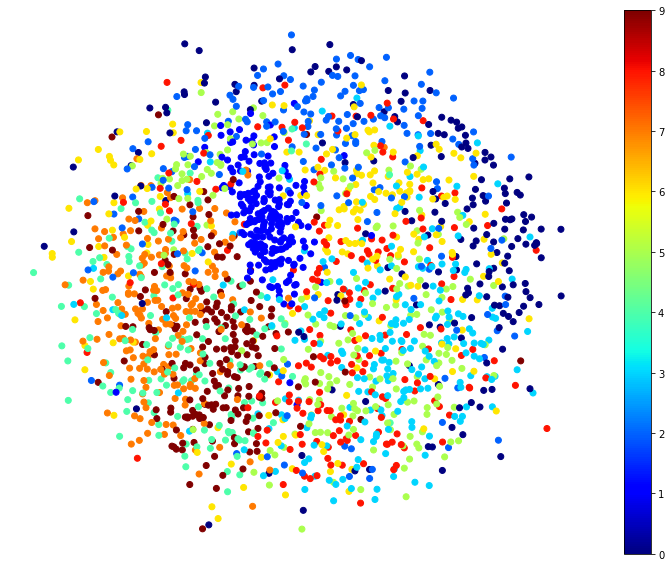

In [0]:
plt.figure(figsize=(13, 10))
plt.scatter(X_mds_reduced[:, 0], X_mds_reduced[:, 1], c=y[:m], cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()

# PCA 95% + MDS

In [0]:
pca_mds_pipeline = Pipeline(
    [
     ('pca', PCA(n_components=0.95, random_state=42)),
     ('mds', MDS(n_components=2, random_state=42))
     ])

start_time = time.time()

X_pca_mds_reduced = pca_mds_pipeline.fit_transform(X[:m])

print("PCA + MDS: {}s".format(time.time() - start_time))

PCA + MDS: 107.85846424102783s


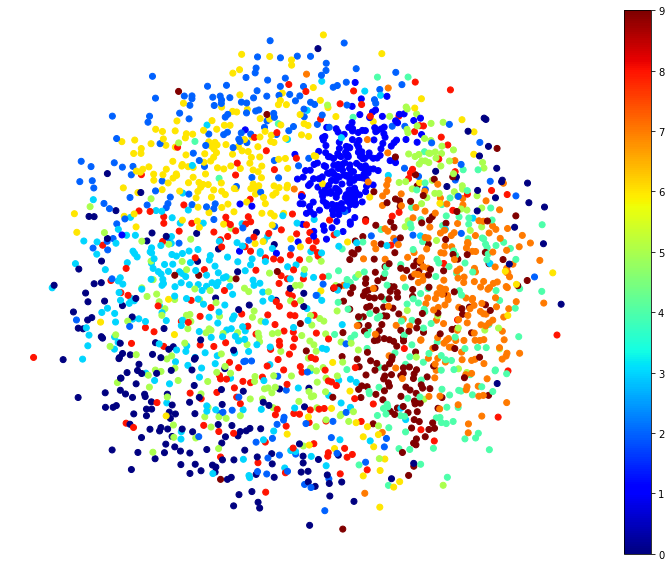

In [0]:
plt.figure(figsize=(13, 10))
plt.scatter(X_pca_mds_reduced[:, 0], X_pca_mds_reduced[:, 1], c=y[:m], cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()

# LDA

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)

start_time = time.time()

X_lda_reduced = lda.fit_transform(X, y)

print("LDA: {}s".format(time.time() - start_time))

LDA: 2.155675172805786s


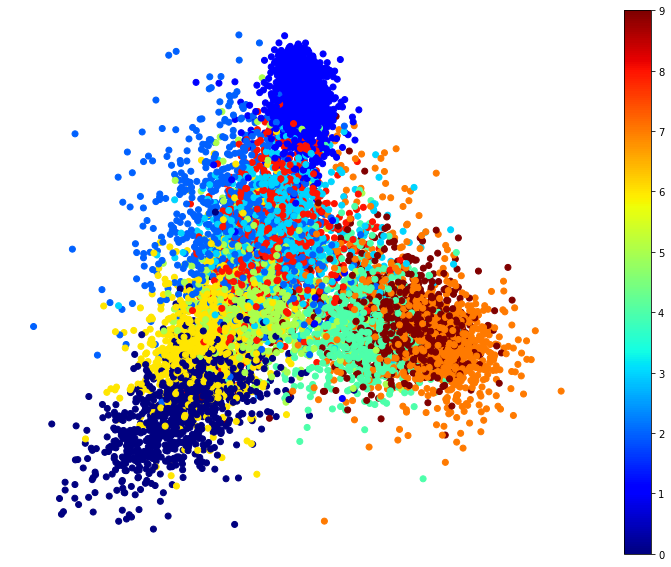

In [0]:
plt.figure(figsize=(13, 10))
plt.scatter(X_lda_reduced[:, 0], X_lda_reduced[:, 1], c=y, cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()

# PCA 95% + t-SNE

In [0]:
pca_tsne_pipeline = Pipeline(
    [
     ('pca', PCA(n_components=0.95, random_state=42)),
     ('tsne', TSNE(n_components=2, random_state=42))
     ])

start_time = time.time()

X_pca_tsne_reduced = pca_tsne_pipeline.fit_transform(X)

print("PCA + T-sne: {}s".format(time.time() - start_time))

PCA + T-sne: 89.48129868507385s


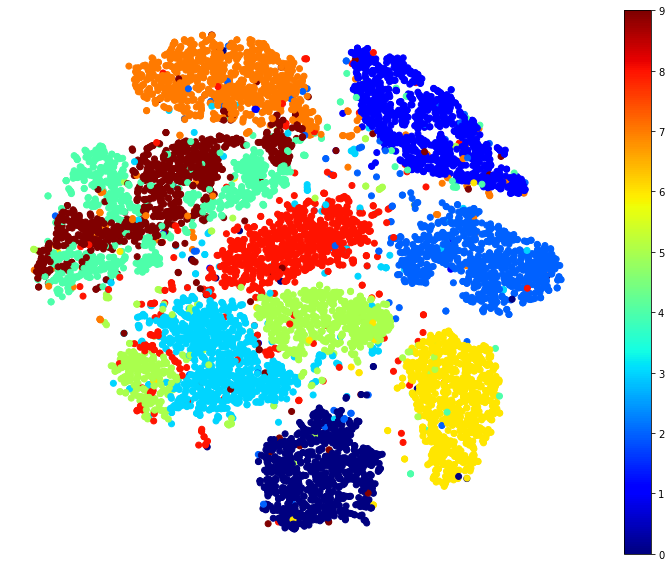

In [0]:
plt.figure(figsize=(13, 10))
plt.scatter(X_pca_tsne_reduced[:, 0], X_pca_tsne_reduced[:, 1], c=y, cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()